In [1]:
import json

# Load the JSON data from the file
with open('enlaces_datos.json', 'r') as file:
    enlaces_datos = json.load(file)

# Access and use the loaded data as a dictionary
for encabezado, enlaces in enlaces_datos.items():
    print(f"Encabezado: {encabezado}")
    for enlace in enlaces:
        print(enlace)
    print()

Encabezado: Valores y metadatos
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-csv.zip
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo.xlsx
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-sqlite.zip

Encabezado: Metadatos enriquecidos de las series
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-metadatos.csv
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-metadatos.xlsx
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-metadatos.dta

Encabezado: Valores
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-valores-csv.zip
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-valores.xlsx
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-valores-dta.zip

Encabezado: Fuentes
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-fuentes.csv
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-fuentes.xlsx
https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-fuentes

## Valores y metadatos - SQLITE

To download the SQLite database file from the given URL, you can use the requests library in Python. Here's an example:

### Bajar el zip

In [2]:
import requests

url = 'https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-sqlite.zip'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the filename from the URL
    filename = url.split('/')[-1]

    # Save the downloaded file
    with open(filename, 'wb') as file:
        file.write(response.content)
    
    print(f"SQLite database file '{filename}' downloaded successfully.")
else:
    print("Failed to download the SQLite database file.")


SQLite database file 'series-tiempo-sqlite.zip' downloaded successfully.


### Descomprimir

In [3]:
import zipfile

zip_filename = 'series-tiempo-sqlite.zip'
extract_directory = './datos/'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_directory)

print(f"The contents of '{zip_filename}' have been extracted to '{extract_directory}'.")


The contents of 'series-tiempo-sqlite.zip' have been extracted to './datos/'.


In [4]:
import sqlite3

database_file = './datos/series-tiempo.sqlite'

# Connect to the SQLite database
conn = sqlite3.connect(database_file)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Retrieve the table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the cursor and the database connection
cursor.close()
conn.close()


fuentes
metadatos
valores


In [5]:
import sqlite3

database_file = './datos/series-tiempo.sqlite'

def show_table_head(table_name, num_rows=5):
    # Connect to the SQLite database
    conn = sqlite3.connect(database_file)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()

    try:
        # Execute the query to retrieve the head of the table
        cursor.execute(f"SELECT * FROM {table_name} LIMIT {num_rows}")
        rows = cursor.fetchall()

        # Print the retrieved rows
        for row in rows:
            print(row)

        # Get the shape of the table
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        num_rows = cursor.fetchone()[0]
        cursor.execute(f"PRAGMA table_info({table_name})")
        columns = cursor.fetchall()
        num_columns = len(columns)

        print(f"\nTabla: {table_name}")
        print(f"Número de filas: {num_rows}")
        print(f"Número de columnas: {num_columns}")

        # Get the number of unique entries per column
        unique_entries = []
        for i in range(num_columns):
            column_name = columns[i][1]
            if column_name is None:
                continue
            cursor.execute(f"SELECT COUNT(DISTINCT {column_name}) FROM {table_name}")
            unique_count = cursor.fetchone()[0]
            unique_entries.append(unique_count)

        print("\nNúmero de entradas únicas por columna:")
        for i in range(num_columns):
            column_name = columns[i][1]
            if column_name is None:
                continue
            unique_count = unique_entries[i]
            print(f"{column_name}: {unique_count}")

    except sqlite3.OperationalError as e:
        print(f"Error: {e}")

    # Close the cursor and the database connection
    cursor.close()
    conn.close()


In [6]:
show_table_head("metadatos")


('1.1_DGCP_D_1993_A_27', 'sspm', '1', '1.1', 'R/P1Y', 'demanda_global_consumo_priv', 'Millones de pesos a precios de 1993', 'Consumo privado desestacionalizado, en millones de pesos de 1993 y Trimestral', 'Oferta y Demanda Global. Precios constantes desestacionalizados. Base 1993. Valores anuales.', 'Consumo privado desestacionalizado, en millones de pesos de 1993 y Trimestral', 'https://infra.datos.gob.ar/catalog/sspm/dataset/1/distribution/1.1/download/oferta-demanda-globales-datos-desestacionalizados-valores-anuales-base-1993.csv', 'Oferta y Demanda Globales. Datos desestacionalizados. Base 1993', 'Instituto Nacional de Estadística y Censos (INDEC)', 'Actividad', 'Componentes desestacionalizados de la oferta y demanda globales a precios de 1993.', 'Actividad', '1993-01-01', '2012-01-01', 20, 3074, 0, 62643.77010394083, 58881.473, 0.06389611047843236, 1, 261, 5, 9, 31)
('1.1_DGCP_D_1993_A_30', 'sspm', '1', '1.1', 'R/P1Y', 'demanda_global_consumo_publico', 'Millones de pesos a precios

In [7]:
show_table_head("valores")


('1.1_OGP_D_1993_A_17', '1993-01-01', 236520.03357744176)
('1.1_OGP_D_1993_A_17', '1994-01-01', 250307.88599999977)
('1.1_OGP_D_1993_A_17', '1995-01-01', 243186.10174999977)
('1.1_OGP_D_1993_A_17', '1996-01-01', 256626.24399999998)
('1.1_OGP_D_1993_A_17', '1997-01-01', 277441.31725)

Tabla: valores
Número de filas: 582501
Número de columnas: 3

Número de entradas únicas por columna:
serie_id: 1747
indice_tiempo: 8975
valor: 284251


## Datos extra del sqlite, a formato CSV

In [8]:
import sqlite3
import pandas as pd

database_file = 'datos/series-tiempo.sqlite'
output_directory = './datos/'

def save_csv(data, filename):
    data.to_csv(output_directory + filename, index=False)
    print(f"CSV file '{filename}' saved successfully.")

def save_metadata_csv():
    conn = sqlite3.connect(database_file)
    cursor = conn.cursor()

    try:
        cursor.execute("SELECT serie_id, catalogo_id, dataset_id, distribucion_id, indice_tiempo_frecuencia FROM metadatos")
        rows = cursor.fetchall()
        df = pd.DataFrame(rows, columns=["serie_id", "catalogo_id", "dataset_id", "distribucion_id", "indice_tiempo_frecuencia"])
        save_csv(df, "index.csv")
    except sqlite3.OperationalError as e:
        print(f"Error: {e}")

    cursor.close()
    conn.close()

def save_csv_group_by_prefix(table_name, column_prefix):
    conn = sqlite3.connect(database_file)
    cursor = conn.cursor()

    try:
        cursor.execute(f"PRAGMA table_info({table_name})")
        columns = cursor.fetchall()

        matching_columns = [column[1] for column in columns if column[1].startswith(column_prefix)]
        if not matching_columns:
            print(f"No columns found with prefix '{column_prefix}' in table '{table_name}'.")
            return

        column_names = ["serie_id"] + matching_columns
        cursor.execute(f"SELECT serie_id, {','.join(matching_columns)} FROM {table_name}")
        rows = cursor.fetchall()
        df = pd.DataFrame(rows, columns=column_names)
        save_csv(df, f"{column_prefix}.csv")
    except sqlite3.OperationalError as e:
        print(f"Error: {e}")

    cursor.close()
    conn.close()


In [9]:

# Usage example:
save_metadata_csv()

save_csv_group_by_prefix("metadatos", "serie")
save_csv_group_by_prefix("metadatos", "distribucion")
save_csv_group_by_prefix("metadatos", "dataset")
save_csv_group_by_prefix("metadatos", "consultas")

CSV file 'index.csv' saved successfully.
CSV file 'serie.csv' saved successfully.
CSV file 'distribucion.csv' saved successfully.
CSV file 'dataset.csv' saved successfully.
CSV file 'consultas.csv' saved successfully.


## Leer CSV

In [10]:
import requests
import zipfile
import os

def download_and_unzip(url, extract_directory=None):
    response = requests.get(url)
    if response.status_code == 200:
        filename = url.split('/')[-1]  # Extract filename from the URL
        
        if not extract_directory:
            extract_directory = os.path.splitext(filename)[0]
        
        with open(filename, 'wb') as file:
            file.write(response.content)
        
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(extract_directory)
        
        os.remove(filename)
        
        print(f"The contents of '{filename}' have been extracted to '{extract_directory}'.")
    else:
        print(f"Failed to download file from '{url}'.")

In [11]:

# URLs for the CSV files
csv_url1 = 'https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-csv.zip'
csv_url2 = 'https://apis.datos.gob.ar/series/api/dump/sspm/series-tiempo-valores-csv.zip'

# Download the CSV file if not present
download_and_unzip(csv_url1, extract_directory = './datos/')
download_and_unzip(csv_url2, extract_directory = './datos/')


The contents of 'series-tiempo-csv.zip' have been extracted to './datos/'.
The contents of 'series-tiempo-valores-csv.zip' have been extracted to './datos/'.


In [12]:
# Filenames for the downloaded files
csv_filename1 = 'series-tiempo.csv'
csv_filename2 = 'series-tiempo-valores.csv'

# Load the CSV file as a DataFrame and show head and shape
df1 = pd.read_csv('./datos/' + csv_filename1, encoding='latin1')
df2 = pd.read_csv('./datos/' + csv_filename2, encoding='latin1')


In [13]:
df1.shape

(3242693, 15)

In [14]:
df2.shape

(3242693, 7)

In [15]:
df1.count()

catalogo_id                 3242693
dataset_id                  3242693
distribucion_id             3242693
serie_id                    3242693
indice_tiempo               3242693
indice_tiempo_frecuencia    3242693
valor                       3006554
serie_titulo                3242693
serie_unidades              3242351
serie_descripcion           3242693
distribucion_descripcion    3242693
dataset_tema                3225446
dataset_responsable         3242693
dataset_fuente              3242693
dataset_titulo              3242693
dtype: int64

In [16]:
df1.nunique()

catalogo_id                       1
dataset_id                      267
distribucion_id                 652
serie_id                      19402
indice_tiempo                 26101
indice_tiempo_frecuencia          5
valor                       1452530
serie_titulo                   7498
serie_unidades                  132
serie_descripcion             10556
distribucion_descripcion        610
dataset_tema                      8
dataset_responsable               2
dataset_fuente                   28
dataset_titulo                  267
dtype: int64

In [17]:
df2.count()

catalogo_id                 3242693
dataset_id                  3242693
distribucion_id             3242693
serie_id                    3242693
indice_tiempo               3242693
valor                       3006554
indice_tiempo_frecuencia    3242693
dtype: int64

In [18]:
df2.nunique()

catalogo_id                       1
dataset_id                      267
distribucion_id                 652
serie_id                      19402
indice_tiempo                 26101
valor                       1452530
indice_tiempo_frecuencia          5
dtype: int64

In [19]:
df1

,catalogo_id,dataset_id,distribucion_id,serie_id,indice_tiempo,indice_tiempo_frecuencia,valor,serie_titulo,serie_unidades,serie_descripcion,distribucion_descripcion,dataset_tema,dataset_responsable,dataset_fuente,dataset_titulo
0,sspm,1,1.1,1.1_OGP_D_1993_A_17,1993-01-01,R/P1Y,236520.033577,oferta_global_pib,Millones de pesos a precios de 1993,"PIB desestacionalizado, en millones de pesos d...","Oferta y Demanda Globales por componente, a pr...",Actividad,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Oferta y Demanda Globales. Datos desestacional...
1,sspm,1,1.1,1.1_OGP_D_1993_A_17,1994-01-01,R/P1Y,250307.886000,oferta_global_pib,Millones de pesos a precios de 1993,"PIB desestacionalizado, en millones de pesos d...","Oferta y Demanda Globales por componente, a pr...",Actividad,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Oferta y Demanda Globales. Datos desestacional...
2,sspm,1,1.1,1.1_OGP_D_1993_A_17,1995-01-01,R/P1Y,243186.101750,oferta_global_pib,Millones de pesos a precios de 1993,"PIB desestacionalizado, en millones de pesos d...","Oferta y Demanda Globales por componente, a pr...",Actividad,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Oferta y Demanda Globales. Datos desestacional...
3,sspm,1,1.1,1.1_OGP_D_1993_A_17,1996-01-01,R/P1Y,256626.244000,oferta_global_pib,Millones de pesos a precios de 1993,"PIB desestacionalizado, en millones de pesos d...","Oferta y Demanda Globales por componente, a pr...",Actividad,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Oferta y Demanda Globales. Datos desestacional...
4,sspm,1,1.1,1.1_OGP_D_1993_A_17,1997-01-01,R/P1Y,277441.317250,oferta_global_pib,Millones de pesos a precios de 1993,"PIB desestacionalizado, en millones de pesos d...","Oferta y Demanda Globales por componente, a pr...",Actividad,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Oferta y Demanda Globales. Datos desestacional...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242688,sspm,98,98.5,124.3_OBSV_OCTU_0_29,2015-06-01,R/P1M,121.550000,otros_bienes_servicios_varios,Ãndice oct-2013/sep-2014=100,Otros bienes y servicios varios Ã­ndice mensua...,Ãndice de Precios al Consumidor Nacional Urba...,Precios,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Ãndice de Precios al Consumidor Nacional Urba...
3242689,sspm,98,98.5,124.3_OBSV_OCTU_0_29,2015-07-01,R/P1M,122.690000,otros_bienes_servicios_varios,Ãndice oct-2013/sep-2014=100,Otros bienes y servicios varios Ã­ndice mensua...,Ãndice de Precios al Consumidor Nacional Urba...,Precios,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Ãndice de Precios al Consumidor Nacional Urba...
3242690,sspm,98,98.5,124.3_OBSV_OCTU_0_29,2015-08-01,R/P1M,125.360000,otros_bienes_servicios_varios,Ãndice oct-2013/sep-2014=100,Otros bienes y servicios varios Ã­ndice mensua...,Ãndice de Precios al Consumidor Nacional Urba...,Precios,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Ãndice de Precios al Consumidor Nacional Urba...
3242691,sspm,98,98.5,124.3_OBSV_OCTU_0_29,2015-09-01,R/P1M,126.230000,otros_bienes_servicios_varios,Ãndice oct-2013/sep-2014=100,Otros bienes y servicios varios Ã­ndice mensua...,Ãndice de Precios al Consumidor Nacional Urba...,Precios,SubsecretarÃ­a de ProgramaciÃ³n MacroeconÃ³mica,Instituto Nacional de EstadÃ­stica y Censos (I...,Ãndice de Precios al Consumidor Nacional Urba...


<Axes: >

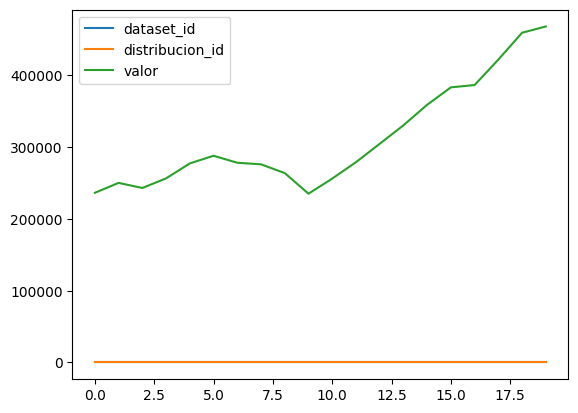

In [22]:
df2.loc[df2.serie_id == '1.1_OGP_D_1993_A_17'].plot()